This notebook provides a few examples of simple codes to introduce:
* [matplotlib](https://matplotlib.org). Check out
  the [gallery](http://matplotlib.org/gallery.html), [examples](http://matplotlib.org/examples/index.html)
  and some [learning  resources](http://matplotlib.org/resources/index.html)
* [astropy](http://www.astropy.org/). Explore the functionality available in Astropy by checking out the [Example Gallery](http://docs.astropy.org/en/stable/generated/examples/), [Tutorials](http://www.astropy.org/astropy-tutorials), and [Documentation](http://docs.astropy.org)


# Matplotlib basics: two approaches

In [1]:
# this works only in notebooks
# the output of matplotlib plotting commands is shown inline
%matplotlib inline

## import matplotlib and numpy

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## generate some data

In [3]:
x=np.linspace(-2,2,20)
y1=x**2
y2=np.exp(x)

## Plotting using pyplot functions
Simple plots can be made very easily using simple functions to add basic elements (lines, labels, a legend)

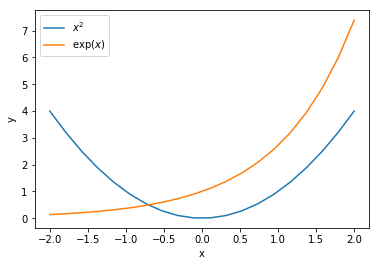

In [4]:
plt.plot(x,y1,label="$x^2$")
plt.plot(x,y2,label="$\exp(x)$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend();
#plt.savefig("fig1a.png") # you can use any extension
#plt.savefig("fig1a.eps") # you can use any extension
#plt.savefig("fig1a.pdf") # you can use any extension


## object-oriented approach
Each "object" is explicitly created and the user have full control on each element.

*"For simple examples this style seems like overkill, however once the graphs get slightly more complex it pays off"*


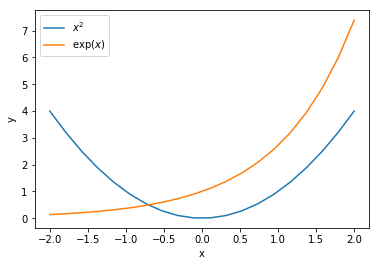

In [5]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x,y1,label="$x^2$")
ax.plot(x,y2,label="$\exp(x)$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend();
#fig.savfig("fig1b.png")

# Reading a fits file (spectrum) and make 1D plot
* Read a fits file with a FITS table
* 1D plot


The fits file is a spectrum downloaded from the <a href="http://archive.eso.org/wdb/wdb/adp/phase3_spectral/form?phase3_collection=PESSTO&release_tag=3">ESO Phase3 archive of the PESSTO survey</a>.
Data are stored in the 1st extension as a FITS table

In [6]:
# "clean" the notebook
# Resets the namespace by removing all names defined by the user
%reset -f

from astropy.io import fits
hdus=fits.open("files/ADP.2017-08-24T09:39:15.889.fits")
tab=hdus[1].data    # data in the 1st extension
hdr=hdus[1].header  # header
hdus.close()

# print info about the file
hdus.info()

Filename: files/ADP.2017-08-24T09:39:15.889.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     279   ()      
  1  PHASE3BINTABLE    1 BinTableHDU     46   1R x 4C   [950E, 950E, 950E, 950E]   


In [7]:
# print the header
hdr

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                15200 / Length of data axis 1                          
NAXIS2  =                    1 / Axis length                                    
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    4 / number of table fields                         
OBJECT  = 'SN2016P '           / Original target.                               
RA      =            209.37958 / 13:57:31.09 RA (J2000) pointing (deg)          
DEC     =               6.0975 / +06:05:51.0 DEC (J2000) pointing (deg)         
CHECKSUM= 'EdNNGbMLEbMLEbML'   / HDU checksum updated 2017-08-23T17:35:40       
DATASUM = '1948663991'      

In [8]:
# print info about the table columns
print (tab.columns)

ColDefs(
    name = 'WAVE'; format = '950E'; unit = 'angstrom'
    name = 'FLUX'; format = '950E'; unit = 'erg cm**(-2) s**(-1) angstrom**(-1)'
    name = 'ERR'; format = '950E'; unit = 'erg cm**(-2) s**(-1) angstrom**(-1)'
    name = 'SKYBACK'; format = '950E'; unit = 'erg cm**(-2) s**(-1) angstrom**(-1)'
)


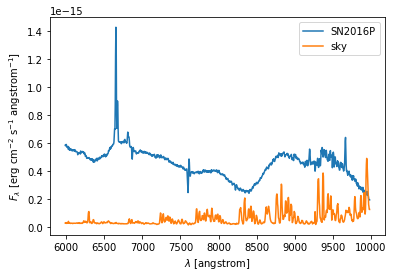

In [9]:
import matplotlib.pylab as plt

# get data from the table
wave=tab[0]["WAVE"]
flux=tab[0]["FLUX"]
sky=tab[0]["SKYBACK"]
# get data from the header
obj=hdr["OBJECT"]

fig,ax=plt.subplots()
ax.plot(wave,flux,label=obj)
ax.plot(wave,sky,label="sky")
ax.legend()
ax.set_xlabel("$\lambda$ [angstrom]");
ax.set_ylabel("$F_\lambda$ [erg cm$^{-2}$ s$^{-1}$ angstrom$^{-1}$]");

# Astropy: Quantities, units, Coordinates

astropy.units handles defining, converting between, and performing arithmetic with physical quantities, such as meters, seconds, Hz, etc. It also handles logarithmic units such as magnitude and decibel.

astropy.units does not know spherical geometry or sexagesimal (hours, min, sec): if you want to deal with celestial coordinates, see the astropy.coordinates package.

The `Quantity` object is meant to represent a value that has some **unit** associated with the **number**.

Link to [`astropy.units` documentation](http://docs.astropy.org/en/stable/units/)

In [10]:
from astropy import units as u

l=1*u.km
t=1*u.s
v=l/t
print (v)

1.0 km / s


In [11]:
# Unit conversion is done using the to() method, which returns a new `Quantity` in the given unit:
v_k=v.to(u.kpc/u.Gyr)
v_k

<Quantity 1.0227121650537077 kpc / Gyr>

## Coordinates

The [astropy.coordinates](http://docs.astropy.org/en/stable/coordinates/index.html) package provides classes for representing a variety of celestial/spatial coordinates and their velocity components, as well as tools for converting between common coordinate systems in a uniform way.


In [12]:
from astropy import units as u
from astropy.coordinates import SkyCoord

# define a `Skycoord` using RA and DEC **with units**
c1 = SkyCoord(ra=8.6252*u.degree, dec=-41.27321*u.degree, frame='icrs')
print ("c1 with no args       :",c1.to_string())
print ("c1 in hmsdms          :",c1.to_string('hmsdms'))

c2=SkyCoord.from_name("M32")
print ("c2 in hmsdms with ':' :",c2.to_string('hmsdms',sep=":",precision=1))
print ("RA of c2 in radians   :",c2.ra.radian)

c2_lb=c2.transform_to('galactic')
print ("Galactic l,b of c2    :",c2_lb.to_string())

print ("RA,DEC {} {}".format(c2.ra.to_string(sep=":",precision=2,unit=u.hour),
                             c2.dec.to_string(sep=":",precision=3)
                            ))


c1 with no args       : 8.6252 -41.2732
c1 in hmsdms          : 00h34m30.048s -41d16m23.556s
c2 in hmsdms with ':' : 00:42:41.8 +40:51:55.0
RA of c2 in radians   : 0.18630168034563072
Galactic l,b of c2    : 121.15 -21.9762
RA,DEC 0:42:41.83 40:51:55.033


# Download an image from the Virtual Observatory and show it
* define a position in the sky
* get an image from the SkyView VO
* display it


In [13]:
%reset -f 
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.skyview import SkyView

coo = SkyCoord.from_name('M51')

# 800x800 pix SDSS g-band image of a 0.3 deg region
hdus=SkyView.get_images(position=coo,
                  survey=['SDSSg'],pixels=(800,800),
                          radius=.3*u.deg
                         )[0]
hdus.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     128   (800, 800)   float32   


In [14]:
# data are in the primary extension
ima=hdus[0].data

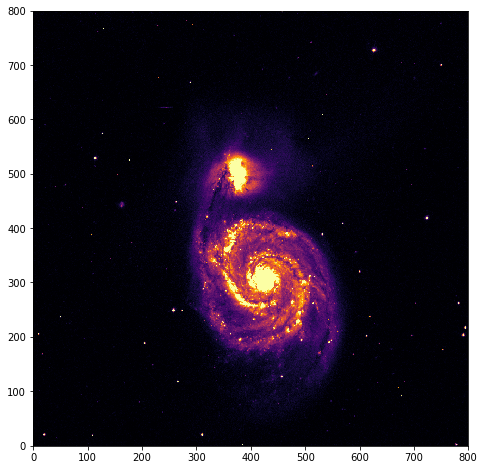

In [15]:
import matplotlib.pyplot as plt
# plot the image using a custom colormap
fig,ax=plt.subplots(figsize=(8,8))
ax.imshow(ima,origin='lower',vmin=0,vmax=1,cmap=plt.cm.inferno);


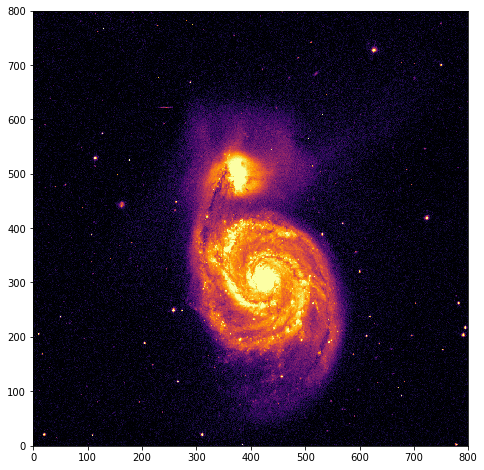

In [16]:
# To enhance low-brightness structure we will use a Asinh intensity scale
import astropy.visualization as vis 
norm = vis.ImageNormalize(vmin=0, vmax=1, stretch=vis.AsinhStretch())
fig,ax=plt.subplots(figsize=(8,8))
ax.imshow(ima,origin='lower',norm=norm,cmap=plt.cm.inferno);


# Get data from Vizier and plot histograms
* retrieve data from Vizier tables
* plot an histogram
* overplot datapoints with custom style
* fit with polynomial

We will download all sources within 10 arcmin from the center of 47Tuc from the 
[2MASS Point Source Catalog](http://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=II/246/out&-out.max=50&-out.form=HTML%20Table&-out.add=_r&-out.add=_RAJ,_DEJ&-sort=_r&-oc.form=sexa)

In [17]:
%reset -f

from astroquery.vizier import Vizier
from astropy import units as u
from astropy.coordinates import SkyCoord

# 2mass PSC is II/246 in vizier
# we select only stars brighter than J=15 mag
# and with QualityFlag=AAA (good photometry)
v=Vizier(catalog="II/246",
        column_filters={'Jmag':"<15","Qflg":"AAA"})

# retrieve all sources
# remove the limit to the number of output objects
v.ROW_LIMIT = -1

coo = SkyCoord.from_name('47Tuc')
tab = v.query_region(coo, radius=10*u.arcmin)[0]
tab.info()

<Table masked=True length=2528>
  name   dtype  unit  format                       description                      
------- ------- ---- -------- ------------------------------------------------------
RAJ2000 float64  deg {:10.6f}                           (ra) Right ascension (J2000)
DEJ2000 float64  deg {:10.6f}                        (dec) Declination (J2000) (dec)
 _2MASS bytes17                                 (designation) Source designation (1)
   Jmag float32  mag  {:6.3f}                ?(j_m) J selected default magnitude (2)
 e_Jmag float32  mag  {:6.3f}         ?(j_msigcom) J total magnitude uncertainty (4)
   Hmag float32  mag  {:6.3f}                ?(h_m) H selected default magnitude (2)
 e_Hmag float32  mag  {:6.3f}         ?(h_msigcom) H total magnitude uncertainty (4)
   Kmag float32  mag  {:6.3f}                ?(k_m) K selected default magnitude (2)
 e_Kmag float32  mag  {:6.3f}         ?(k_msigcom) K total magnitude uncertainty (4)
   Qflg  bytes3                  

In [18]:
# jupyter provides a nice visualization of Tables
tab

RAJ2000,DEJ2000,_2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Qflg,Rflg,Bflg,Cflg,Xflg,Aflg
deg,deg,,mag,mag,mag,mag,mag,mag,,,,,,
float64,float64,bytes17,float32,float32,float32,float32,float32,float32,bytes3,bytes3,bytes3,bytes3,uint8,uint8
5.617088,-72.190170,00222810-7211246,14.011,0.030,13.588,0.035,13.431,0.039,AAA,222,111,000,0,0
5.651956,-72.193710,00223646-7211373,12.494,0.024,11.980,0.021,11.938,0.027,AAA,222,111,000,0,0
5.667273,-72.196327,00224014-7211467,12.535,0.024,12.103,0.026,11.998,0.024,AAA,222,111,000,0,0
5.670300,-72.188904,00224087-7211200,14.713,0.036,14.164,0.038,14.205,0.073,AAA,222,111,ccc,0,0
5.695822,-72.197067,00224699-7211494,13.971,0.039,13.460,0.026,13.414,0.041,AAA,222,111,000,0,0
5.733195,-72.188850,00225596-7211198,14.156,0.040,13.622,0.040,13.564,0.047,AAA,222,111,000,0,0
5.744662,-72.197983,00225871-7211527,13.155,0.029,12.621,0.037,12.537,0.027,AAA,222,111,000,0,0
5.733921,-72.209015,00225614-7212324,12.577,0.030,12.009,0.035,11.916,0.029,AAA,222,111,000,0,0


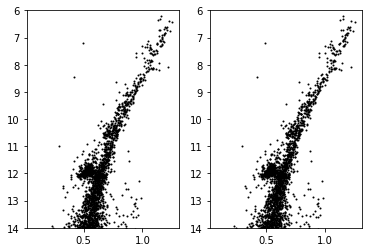

In [19]:
import matplotlib.pylab as plt
J=tab["Jmag"]
K=tab["Kmag"]

# make a figure with 2 subplots arranged in a 2x1 grid
# (1 row, 2 columns)

fig,axes=plt.subplots(1,2)
# axes is a list (actually a numpy array) with the two axes

axes[0].plot(J-K,K,marker='.',linestyle='none',color='k',markersize=2)
# the same, but using abbreviatrions
axes[1].plot(J-K,K,'.k',ms=2)  # ms= MarkerSize

for ax in axes:
    ax.set_ylim(14,6)

bins: [  6.    6.5   7.    7.5   8.    8.5   9.    9.5  10.   10.5  11. ]
len : 11
n   : [  5.  15.  30.  22.  25.  34.  53.  58.  88.  92.]
len : 10


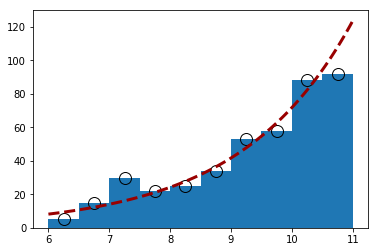

In [20]:
import numpy as np

bins=np.linspace(6,11,11)
fig,ax=plt.subplots()
n,bins,p=ax.hist(K,bins=bins)

print ("bins:",bins)
print ("len :",len(bins))
print ("n   :",n)
print ("len :",len(n))

## TRICKY!!
# bins are the edges of the bins.
# we have 10 bins, 11 egdes
# bins [6.0 - 6.5], [6.5 - 7.0] - ... [10.5 - 11.0]
# 
# get the 10 centers of the bin:
cent=0.5*(bins[1:]+bins[:-1])

# plot the center of the bins and the histogram value
# circles with black ('k') edges, empty (facecolor=none) and of size 12
ax.plot(cent,n,'o',markerfacecolor='none',mec='k',ms=12) # mec=MarkerEdgeColor, you can use mfc for markerfacecolor

# the LF of RGB is ~exponential, we want to fit it

# take the log of N
logn=np.log(n)
# fit with a line (polynomial with degree=1) 
pfit=np.polyfit(cent,logn,1)

# best-fit line:
# generate 100 points in [6,11]
xfit=np.linspace(6,11,100)
# evaluate the poly
yy=np.polyval(pfit,xfit)
# the best-fit is e^yy
yfit=np.exp(yy)
# overplot the fit, using dotted "--" line
# linewidth=3
# color defined by RGB tuple (r=0.6,g=0,b=0)
ax.plot(xfit,yfit,ls="--",c=(0.6,0,0),lw=3);


Useful links: [line styles](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle), [markers](https://matplotlib.org/api/markers_api.html)

# Other examples of plots
Have a look at [matplotlib gallery](https://matplotlib.org/gallery.html)


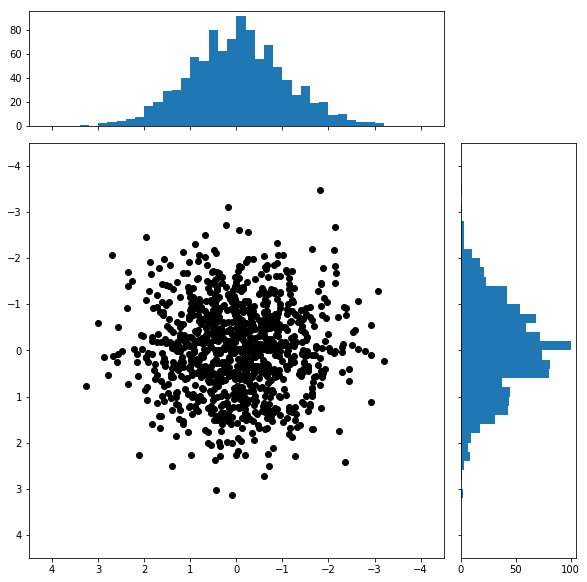

In [21]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

# random data
x = np.random.randn(1000)
y = np.random.randn(1000)


binwidth=0.2
bins=np.arange(-5,5,binwidth)


fig=plt.figure(figsize=(8,8))
# add_axes([x0,y0,dx,dy]) defines the position of the ax
# x0,y0 is the position of the lower-left corner
# dx,dy are the horizontal and vertical dimensions
# all quantities are in fractions of figure width and height
axPlot  = fig.add_axes([0.10, 0.10, 0.72, 0.72])
axHistx = fig.add_axes([0.10, 0.85, 0.72, 0.20])
axHisty = fig.add_axes([0.85, 0.10, 0.20, 0.72])


axPlot.plot(x,y,'ok')
axHistx.hist(x,bins=bins)
axHisty.hist(y,bins=bins,orientation='horizontal')

# set the limits
lim=-4.5
axPlot.set_xlim(-lim,lim)
axPlot.set_ylim(-lim,lim)
axHistx.set_xlim(-lim,lim)
axHisty.set_ylim(-lim,lim)

# hide x-ticklabels of histX and y-ticklabels of histY
axHistx.xaxis.set_major_formatter(NullFormatter())
axHisty.yaxis.set_major_formatter(NullFormatter())

## scatter plot
you can control color and size of points

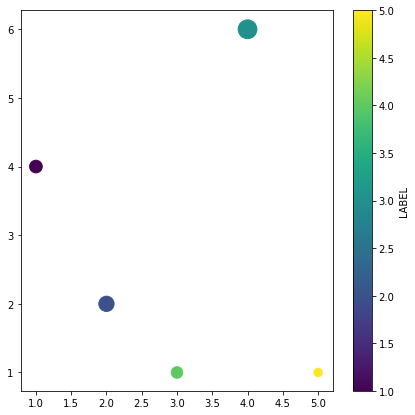

In [22]:
%reset -f 
import numpy as np
import matplotlib.pyplot as plt

# random data
x = [1,2,4,3,5]
y = [4,2,6,1,1]
s = [160,233,353,133,71]
c= [1,2,3,4,5]
fig,ax=plt.subplots(figsize=(7,7))

# points at (x,y) with size proportinal to s and 
# color coded according to s
sc=ax.scatter(x,y,s=s,c=c)
cb=fig.colorbar(sc)
cb.set_label("LABEL")

## tricontour
Draw contours on an unstructured triangular grid.

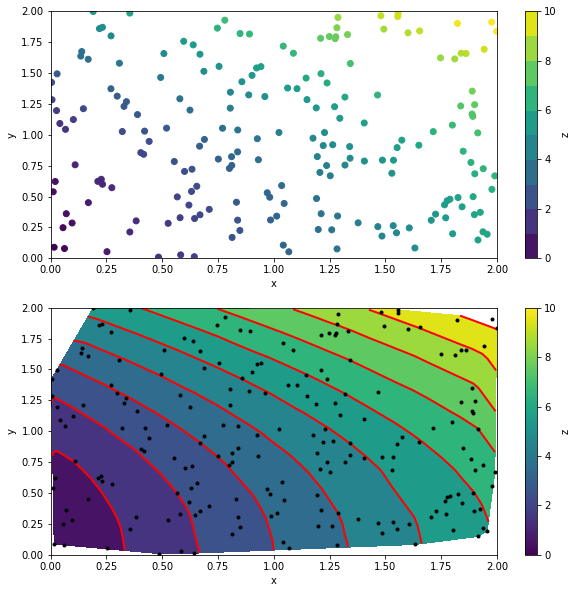

In [23]:
%reset -f 
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import numpy.random as rnd
import matplotlib.mlab as mlab
import time

# set the seed number of the random number generator
rnd.seed(12)
npts = 200
x = rnd.uniform(0, 2, npts)
y = rnd.uniform(0, 2, npts)
z = x*3+1.2*y**2#*np.exp(-x**2 - y**2)

vmin=0
vmax=10
binsize=1
levels=np.arange(vmin,vmax+binsize,1)

fig,axes=plt.subplots(2,1,figsize=(10,10))

# scatter plot color coding according to z
sc=axes[0].scatter(x,y,c=z,vmin=vmin,vmax=vmax)
cb1=fig.colorbar(sc,ax=axes[1])

####  2nd plot, using tricontour

# draw the contour lines
axes[1].tricontour(x, y, z,  levels=levels,linewidths=2, colors='r')
# fill the contours with colors
tt=axes[1].tricontourf(x, y, z, levels=levels,
                    norm=plt.Normalize(vmax=vmax, vmin=vmin))
cb2=fig.colorbar(tt,ax=axes[0])

axes[1].plot(x, y, 'ko', ms=3)

cb1.set_label('z')
cb2.set_label('z')

for ax in axes:
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
